In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from tqdm.notebook import tqdm

from pymorphy2 import MorphAnalyzer

# BAZA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
from argparse import Namespace
from collections import Counter
import string
import os
# OSNOVA
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as opt
from torch.utils.data import Dataset, DataLoader
from tqdm.notebook import tqdm
from torchmetrics.functional import r2_score
from sklearn.model_selection import train_test_split
import fasttext
import fasttext.util

In [37]:
train_df = pd.read_csv('data/vacancies_train.csv')
test_df = pd.read_csv('data/vacancies_test.csv')

In [38]:
cleaned_train = pd.read_csv('data/preprocessed_data_train.csv')
cleaned_test = pd.read_csv('data/preprocessed_data_test.csv')

In [39]:
cleaned_train

,text,target
0,водитель экспедитор категория м газель тент га...,42500.0
1,обязанность списывание материал производство п...,50000.0
2,крупный федеральный сеть магазин магнит требов...,31500.0
3,крупный федеральный сеть магазин мужской женск...,36700.0
4,обязанность уборка производственный площадь ку...,37000.0
...,...,...
16624,обязанность обеспечение общественный порядок о...,67500.0
16625,обязанность оказывать квалифицировать медицинс...,50000.0
16626,условие официальный оформление тк рф график ра...,50000.0
16627,обязанность своевременный качественный выполне...,75000.0


In [40]:
cleaned_train

,text,target
0,водитель экспедитор категория м газель тент га...,42500.0
1,обязанность списывание материал производство п...,50000.0
2,крупный федеральный сеть магазин магнит требов...,31500.0
3,крупный федеральный сеть магазин мужской женск...,36700.0
4,обязанность уборка производственный площадь ку...,37000.0
...,...,...
16624,обязанность обеспечение общественный порядок о...,67500.0
16625,обязанность оказывать квалифицировать медицинс...,50000.0
16626,условие официальный оформление тк рф график ра...,50000.0
16627,обязанность своевременный качественный выполне...,75000.0


In [41]:
train_df['cleaned'] = cleaned_train.text
test_df['cleaned'] = cleaned_test.text

In [42]:
train_df

,name,experience,schedule,employment,description,key_skills,salary,cleaned
0,Водитель-экспедитор,От 3 до 6 лет,Полный день,Полная занятость,"Водитель-экспедитор категории В,С (а\м ГАЗЕЛЬ ...",[],42500.0,водитель экспедитор категория м газель тент га...
1,Кладовщик-комплектовщик/оператор 1С,От 1 года до 3 лет,Полный день,Полная занятость,Обязанности: Списывание материалов в произво...,"['знание пк', 'работа в 1С', 'Работа в команде...",50000.0,обязанность списывание материал производство п...
2,"Продавец магазина ""Магнит"" (Кировский р-он, В....",Нет опыта,Сменный график,Полная занятость,"В крупнейшую Федеральную сеть магазинов ""Магни...",[],31500.0,крупный федеральный сеть магазин магнит требов...
3,Администратор магазина (ТЦ Spar),От 1 года до 3 лет,Полный день,Полная занятость,Крупная федеральная сеть магазинов мужской и ж...,[],36700.0,крупный федеральный сеть магазин мужской женск...
4,Мойщик посуды (кулинария),Нет опыта,Сменный график,Полная занятость,Обязанности: Уборка производственных площадей...,"['Пользователь ПК', 'Грамотная речь', 'Работа ...",37000.0,обязанность уборка производственный площадь ку...
...,...,...,...,...,...,...,...,...
16624,Полицейский специального полка полиции,Нет опыта,Полный день,Полная занятость,Обязанности: обеспечение общественного поряд...,"['Грамотная речь', 'Обучение и развитие', 'Упр...",67500.0,обязанность обеспечение общественный порядок о...
16625,Врач стоматолог-ортопед (г. Новосибирск),Нет опыта,Полный день,Полная занятость,Обязанности: Оказывает квалифицированную меди...,['Медицинская документация'],50000.0,обязанность оказывать квалифицировать медицинс...
16626,Фармацевт,От 1 года до 3 лет,Полный день,Полная занятость,Условия: официальное оформление по ТК РФ; гра...,"['Пользователь ПК', 'Работа в команде', 'Грамо...",50000.0,условие официальный оформление тк рф график ра...
16627,Геодезист (автодороги),От 1 года до 3 лет,Вахтовый метод,Полная занятость,Обязанности: своевременное и качественное вып...,[],75000.0,обязанность своевременный качественный выполне...


In [43]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16629 entries, 0 to 16628
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         16629 non-null  object 
 1   experience   16629 non-null  object 
 2   schedule     16629 non-null  object 
 3   employment   16629 non-null  object 
 4   description  16629 non-null  object 
 5   key_skills   16629 non-null  object 
 6   salary       16629 non-null  float64
 7   cleaned      16629 non-null  object 
dtypes: float64(1), object(7)
memory usage: 1.0+ MB


# EDA

#### Посмотрим на распределение зарплаты

In [44]:
def count_outliers(df, feature_name):
    Q1 = df[feature_name].quantile(0.25)
    Q3 = df[feature_name].quantile(0.75)
    IQR = Q3 - Q1
    
    return df[feature_name][(df[feature_name] > Q3 + 1.5*IQR) | (df[feature_name] < Q1 - 1.5*IQR)].count()

Text(0.5, 1.0, 'Salary distribution')

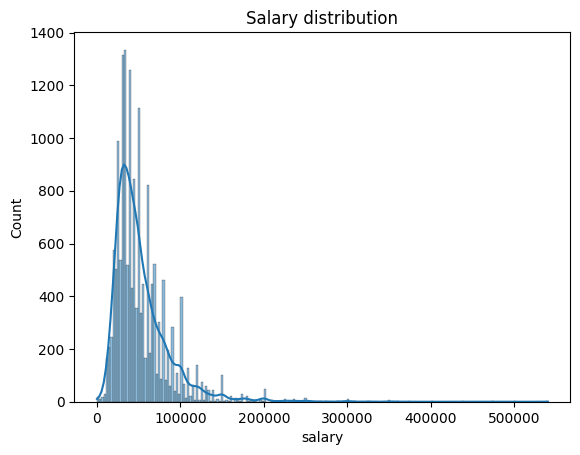

In [45]:
ax = sns.histplot(train_df.salary, kde=True, bins=200)
ax.set_title("Salary distribution")

In [46]:
additional_features = pd.DataFrame()

In [47]:
additional_features['salary_log'] = np.log(train_df.salary)

Text(0.5, 1.0, 'Salary log distribution')

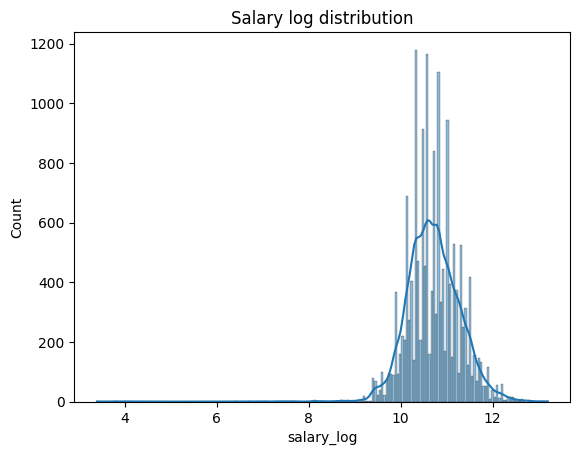

In [48]:
ax = sns.histplot(additional_features.salary_log, kde=True, bins=200)
ax.set_title("Salary log distribution")

<AxesSubplot: xlabel='salary'>

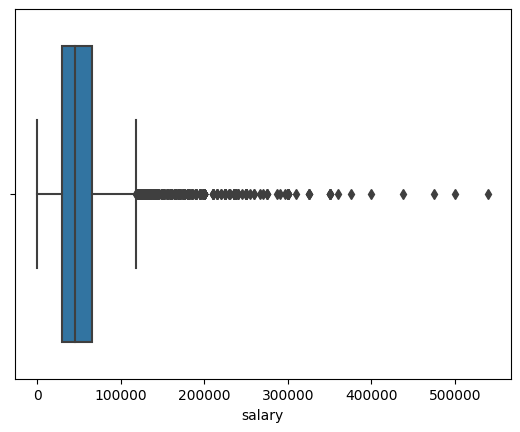

In [49]:
sns.boxplot(data=train_df, x="salary")

<AxesSubplot: xlabel='salary_log'>

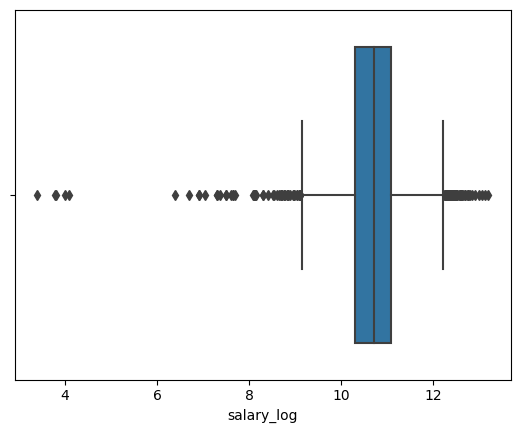

In [50]:
sns.boxplot(data=additional_features, x="salary_log")

In [51]:
count_outliers(train_df, "salary")

778

In [52]:
count_outliers(additional_features, "salary_log")

148

* Очевидно, нужно использовать логарифмированный таргет


In [53]:
def plot_cat_feature_bar(df, feature_name, ax):
    return sns.barplot(
        df, 
        x=df[feature_name].value_counts().index,
        y=df[feature_name].value_counts(),
        ax=ax
    )

#### Проверяем опыт работы

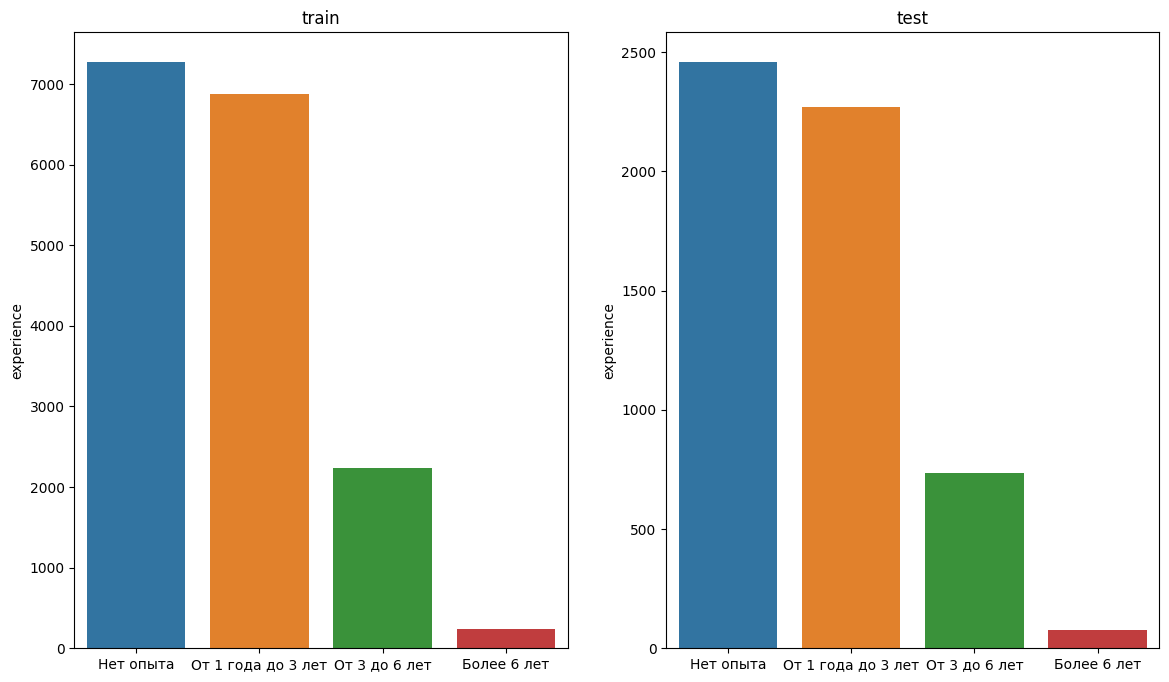

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(14, 8))
ax1 = plot_cat_feature_bar(train_df, "experience", ax=ax[0])
ax1.set_title("train")
ax2 = plot_cat_feature_bar(test_df, "experience", ax=ax[1])
ax2.set_title("test")
pass

In [55]:
train_df.groupby("experience")['salary'].mean().sort_values(ascending=False)

experience
Более 6 лет           97329.662393
От 3 до 6 лет         75364.014982
От 1 года до 3 лет    55813.786659
Нет опыта             41504.271366
Name: salary, dtype: float64

In [56]:
train_df.groupby("experience")['salary'].min().sort_values(ascending=False)

experience
Более 6 лет           25000.0
От 3 до 6 лет            55.0
Нет опыта                44.0
От 1 года до 3 лет       30.0
Name: salary, dtype: float64

In [57]:
train_df.groupby("experience")['salary'].describe()

,count,mean,std,min,25%,50%,75%,max
experience,,,,,,,,
Более 6 лет,234.0,97329.662393,60438.271099,25000.0,60000.00,85000.0,116875.0,500000.0
Нет опыта,7278.0,41504.271366,26797.887442,44.0,25005.00,35000.0,50000.0,540000.0
От 1 года до 3 лет,6881.0,55813.786659,31470.299716,30.0,35000.00,48000.0,68000.0,437500.0
От 3 до 6 лет,2236.0,75364.014982,42652.663479,55.0,45993.75,67100.0,91954.0,350000.0


Какие то слишком маленькие значения

In [58]:
train_df.query("salary < 100")

,name,experience,schedule,employment,description,key_skills,salary,cleaned
163,Ведущий специалист/Руководитель тендерного отдела,От 3 до 6 лет,Полный день,Полная занятость,Компания-поставщик медицинских расходных матер...,"['Государственные закупки', 'Тендеры', 'Участи...",55.0,компания поставщик медицинский расходный матер...
2641,Продавец консультант/старший(ТЦ Эльгрин),От 1 года до 3 лет,Полный день,Полная занятость,Должностные обязанности: - консультирование кл...,"['Клиентоориентированность', 'Мерчандайзинг', ...",30.0,должностной обязанность консультирование клиен...
9696,Фрезеровщик,От 1 года до 3 лет,Полный день,Полная занятость,Обязанности: Обработка деталей на горизонталь...,"['Пользователь ПК', 'Работа в команде', 'Точно...",60.0,обязанность обработка деталь горизонтально фре...
13491,Инженер-экономист,От 1 года до 3 лет,Полный день,Полная занятость,Обязанности Работа с ресурсоснабжающими органи...,"['Работа с большим объемом информации', 'Делов...",45.0,обязанность работа ресурсоснабжающий организац...
16235,Комплектовщик (Тарасовка),Нет опыта,Сменный график,Полная занятость,Сервис доставки продуктов Ленточка приглашает ...,[],44.0,сервис доставка продукт ленточка приглашать ко...


Явная ошибка - удаляем

In [59]:
additional_features.drop(train_df.query("salary < 100").index)
train_df.drop(train_df.query("salary < 100").index)

,name,experience,schedule,employment,description,key_skills,salary,cleaned
0,Водитель-экспедитор,От 3 до 6 лет,Полный день,Полная занятость,"Водитель-экспедитор категории В,С (а\м ГАЗЕЛЬ ...",[],42500.0,водитель экспедитор категория м газель тент га...
1,Кладовщик-комплектовщик/оператор 1С,От 1 года до 3 лет,Полный день,Полная занятость,Обязанности: Списывание материалов в произво...,"['знание пк', 'работа в 1С', 'Работа в команде...",50000.0,обязанность списывание материал производство п...
2,"Продавец магазина ""Магнит"" (Кировский р-он, В....",Нет опыта,Сменный график,Полная занятость,"В крупнейшую Федеральную сеть магазинов ""Магни...",[],31500.0,крупный федеральный сеть магазин магнит требов...
3,Администратор магазина (ТЦ Spar),От 1 года до 3 лет,Полный день,Полная занятость,Крупная федеральная сеть магазинов мужской и ж...,[],36700.0,крупный федеральный сеть магазин мужской женск...
4,Мойщик посуды (кулинария),Нет опыта,Сменный график,Полная занятость,Обязанности: Уборка производственных площадей...,"['Пользователь ПК', 'Грамотная речь', 'Работа ...",37000.0,обязанность уборка производственный площадь ку...
...,...,...,...,...,...,...,...,...
16624,Полицейский специального полка полиции,Нет опыта,Полный день,Полная занятость,Обязанности: обеспечение общественного поряд...,"['Грамотная речь', 'Обучение и развитие', 'Упр...",67500.0,обязанность обеспечение общественный порядок о...
16625,Врач стоматолог-ортопед (г. Новосибирск),Нет опыта,Полный день,Полная занятость,Обязанности: Оказывает квалифицированную меди...,['Медицинская документация'],50000.0,обязанность оказывать квалифицировать медицинс...
16626,Фармацевт,От 1 года до 3 лет,Полный день,Полная занятость,Условия: официальное оформление по ТК РФ; гра...,"['Пользователь ПК', 'Работа в команде', 'Грамо...",50000.0,условие официальный оформление тк рф график ра...
16627,Геодезист (автодороги),От 1 года до 3 лет,Вахтовый метод,Полная занятость,Обязанности: своевременное и качественное вып...,[],75000.0,обязанность своевременный качественный выполне...


In [60]:
additional_features.shape, train_df.shape

((16629, 1), (16629, 8))

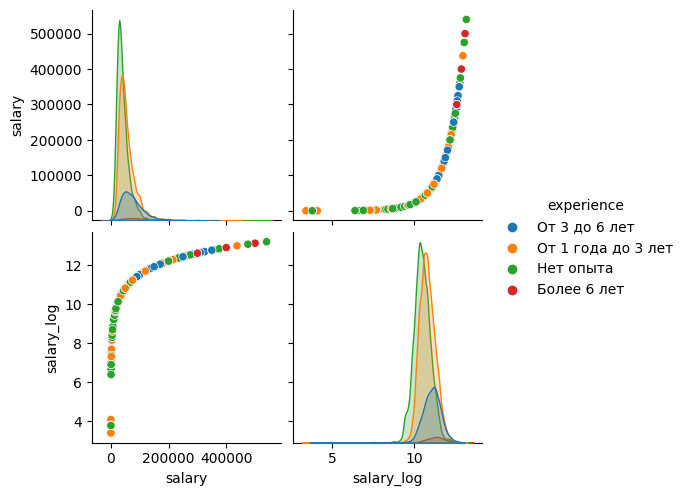

In [61]:
sns.pairplot(pd.concat([train_df, additional_features], axis=1), hue="experience")

* Как видим, данные на тесте и трейне распределены одинаково  
* Так же опыт работы напрямую влияет на получаемую з/п
* Попробуем закодировать опыт работы в виде порядка

In [62]:
additional_features['experience_num'] = train_df.experience.apply(
    {"Нет опыта":0, "От 1 года до 3 лет": 1, "От 3 до 6 лет": 2, "Более 6 лет": 3}.get)

In [63]:
pd.concat([train_df, additional_features], axis=1).corr()

C:\Users\Windows\AppData\Local\Temp\ipykernel_4852\2005712601.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.concat([train_df, additional_features], axis=1).corr()


,salary,salary_log,experience_num
salary,1.000000,0.884108,0.361720
salary_log,0.884108,1.000000,0.390017
experience_num,0.361720,0.390017,1.000000


* Замечательная корреляция - не слишком большая и не слишком маленькая

#### Попробуем вмето этого сделать dummies

In [64]:
dummies = pd.get_dummies(train_df.experience)
dummies.head()

,Более 6 лет,Нет опыта,От 1 года до 3 лет,От 3 до 6 лет
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,1,0,0


In [65]:
dummies.columns = ['experience_senior', 'experience_intern', 'experience_junior', 'experience_middle']
dummies = dummies[['experience_intern', 'experience_junior', 'experience_middle', 'experience_senior']]

In [66]:
dummies.head()

,experience_intern,experience_junior,experience_middle,experience_senior
0,0,0,1,0
1,0,1,0,0
2,1,0,0,0
3,0,1,0,0
4,1,0,0,0


In [67]:
pd.concat([dummies, additional_features.experience_num, additional_features.salary_log, ], axis=1).corr()

,experience_intern,experience_junior,experience_middle,experience_senior,experience_num,salary_log
experience_intern,1.000000,-0.741216,-0.347726,-0.105397,-0.860219,-0.342773
experience_junior,-0.741216,1.000000,-0.331153,-0.100374,0.310835,0.133186
experience_middle,-0.347726,-0.331153,1.000000,-0.047088,0.675962,0.260846
experience_senior,-0.105397,-0.100374,-0.047088,1.000000,0.365575,0.131306
experience_num,-0.860219,0.310835,0.675962,0.365575,1.000000,0.390017
salary_log,-0.342773,0.133186,0.260846,0.131306,0.390017,1.000000


In [68]:
additional_features = pd.concat([additional_features, dummies], axis=1)

In [69]:
additional_features

,salary_log,experience_num,experience_intern,experience_junior,experience_middle,experience_senior
0,10.657259,2,0,0,1,0
1,10.819778,1,0,1,0,0
2,10.357743,0,1,0,0,0
3,10.510532,1,0,1,0,0
4,10.518673,0,1,0,0,0
...,...,...,...,...,...,...
16624,11.119883,0,1,0,0,0
16625,10.819778,0,1,0,0,0
16626,10.819778,1,0,1,0,0
16627,11.225243,1,0,1,0,0


### Теперь поанализируем расписания работы

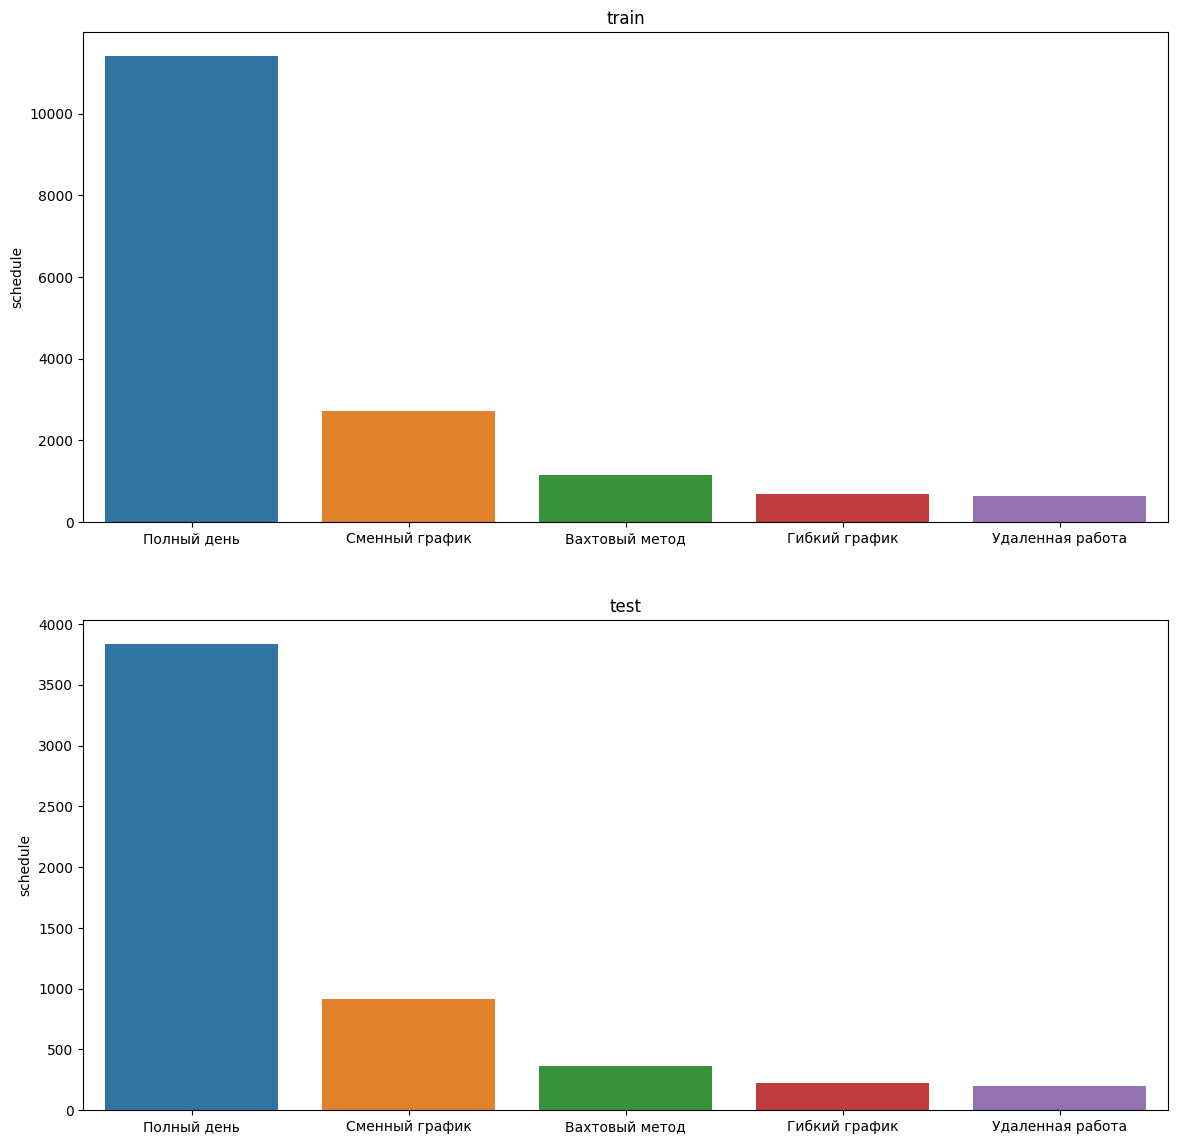

In [70]:
fig, ax = plt.subplots(2, 1, figsize=(14, 14))
ax1 = plot_cat_feature_bar(train_df, "schedule", ax=ax[0])
ax1.set_title("train")
ax2 = plot_cat_feature_bar(test_df, "schedule", ax=ax[1])
ax2.set_title("test")
pass

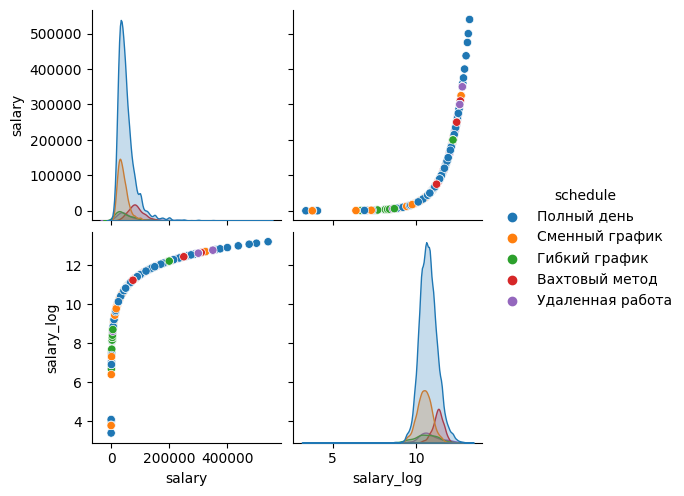

In [71]:
sns.pairplot(pd.concat([train_df[['salary', 'schedule']], additional_features.salary_log], axis=1), hue="schedule")

In [72]:
dummies = pd.get_dummies(train_df.schedule)
display(dummies.head())
dummies.columns = ['schedule_vacht', 'schedule_flexible', 'schedule_full', 'schedule_shift', 'schedule_remote']
display(dummies.head())

,Вахтовый метод,Гибкий график,Полный день,Сменный график,Удаленная работа
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,0,1,0
3,0,0,1,0,0
4,0,0,0,1,0


,schedule_vacht,schedule_flexible,schedule_full,schedule_shift,schedule_remote
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,0,1,0
3,0,0,1,0,0
4,0,0,0,1,0


In [73]:
additional_features = pd.concat([additional_features, dummies], axis=1)

In [74]:
additional_features

,salary_log,experience_num,experience_intern,experience_junior,experience_middle,experience_senior,schedule_vacht,schedule_flexible,schedule_full,schedule_shift,schedule_remote
0,10.657259,2,0,0,1,0,0,0,1,0,0
1,10.819778,1,0,1,0,0,0,0,1,0,0
2,10.357743,0,1,0,0,0,0,0,0,1,0
3,10.510532,1,0,1,0,0,0,0,1,0,0
4,10.518673,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
16624,11.119883,0,1,0,0,0,0,0,1,0,0
16625,10.819778,0,1,0,0,0,0,0,1,0,0
16626,10.819778,1,0,1,0,0,0,0,1,0,0
16627,11.225243,1,0,1,0,0,1,0,0,0,0


### Посмотрим на тип занятости

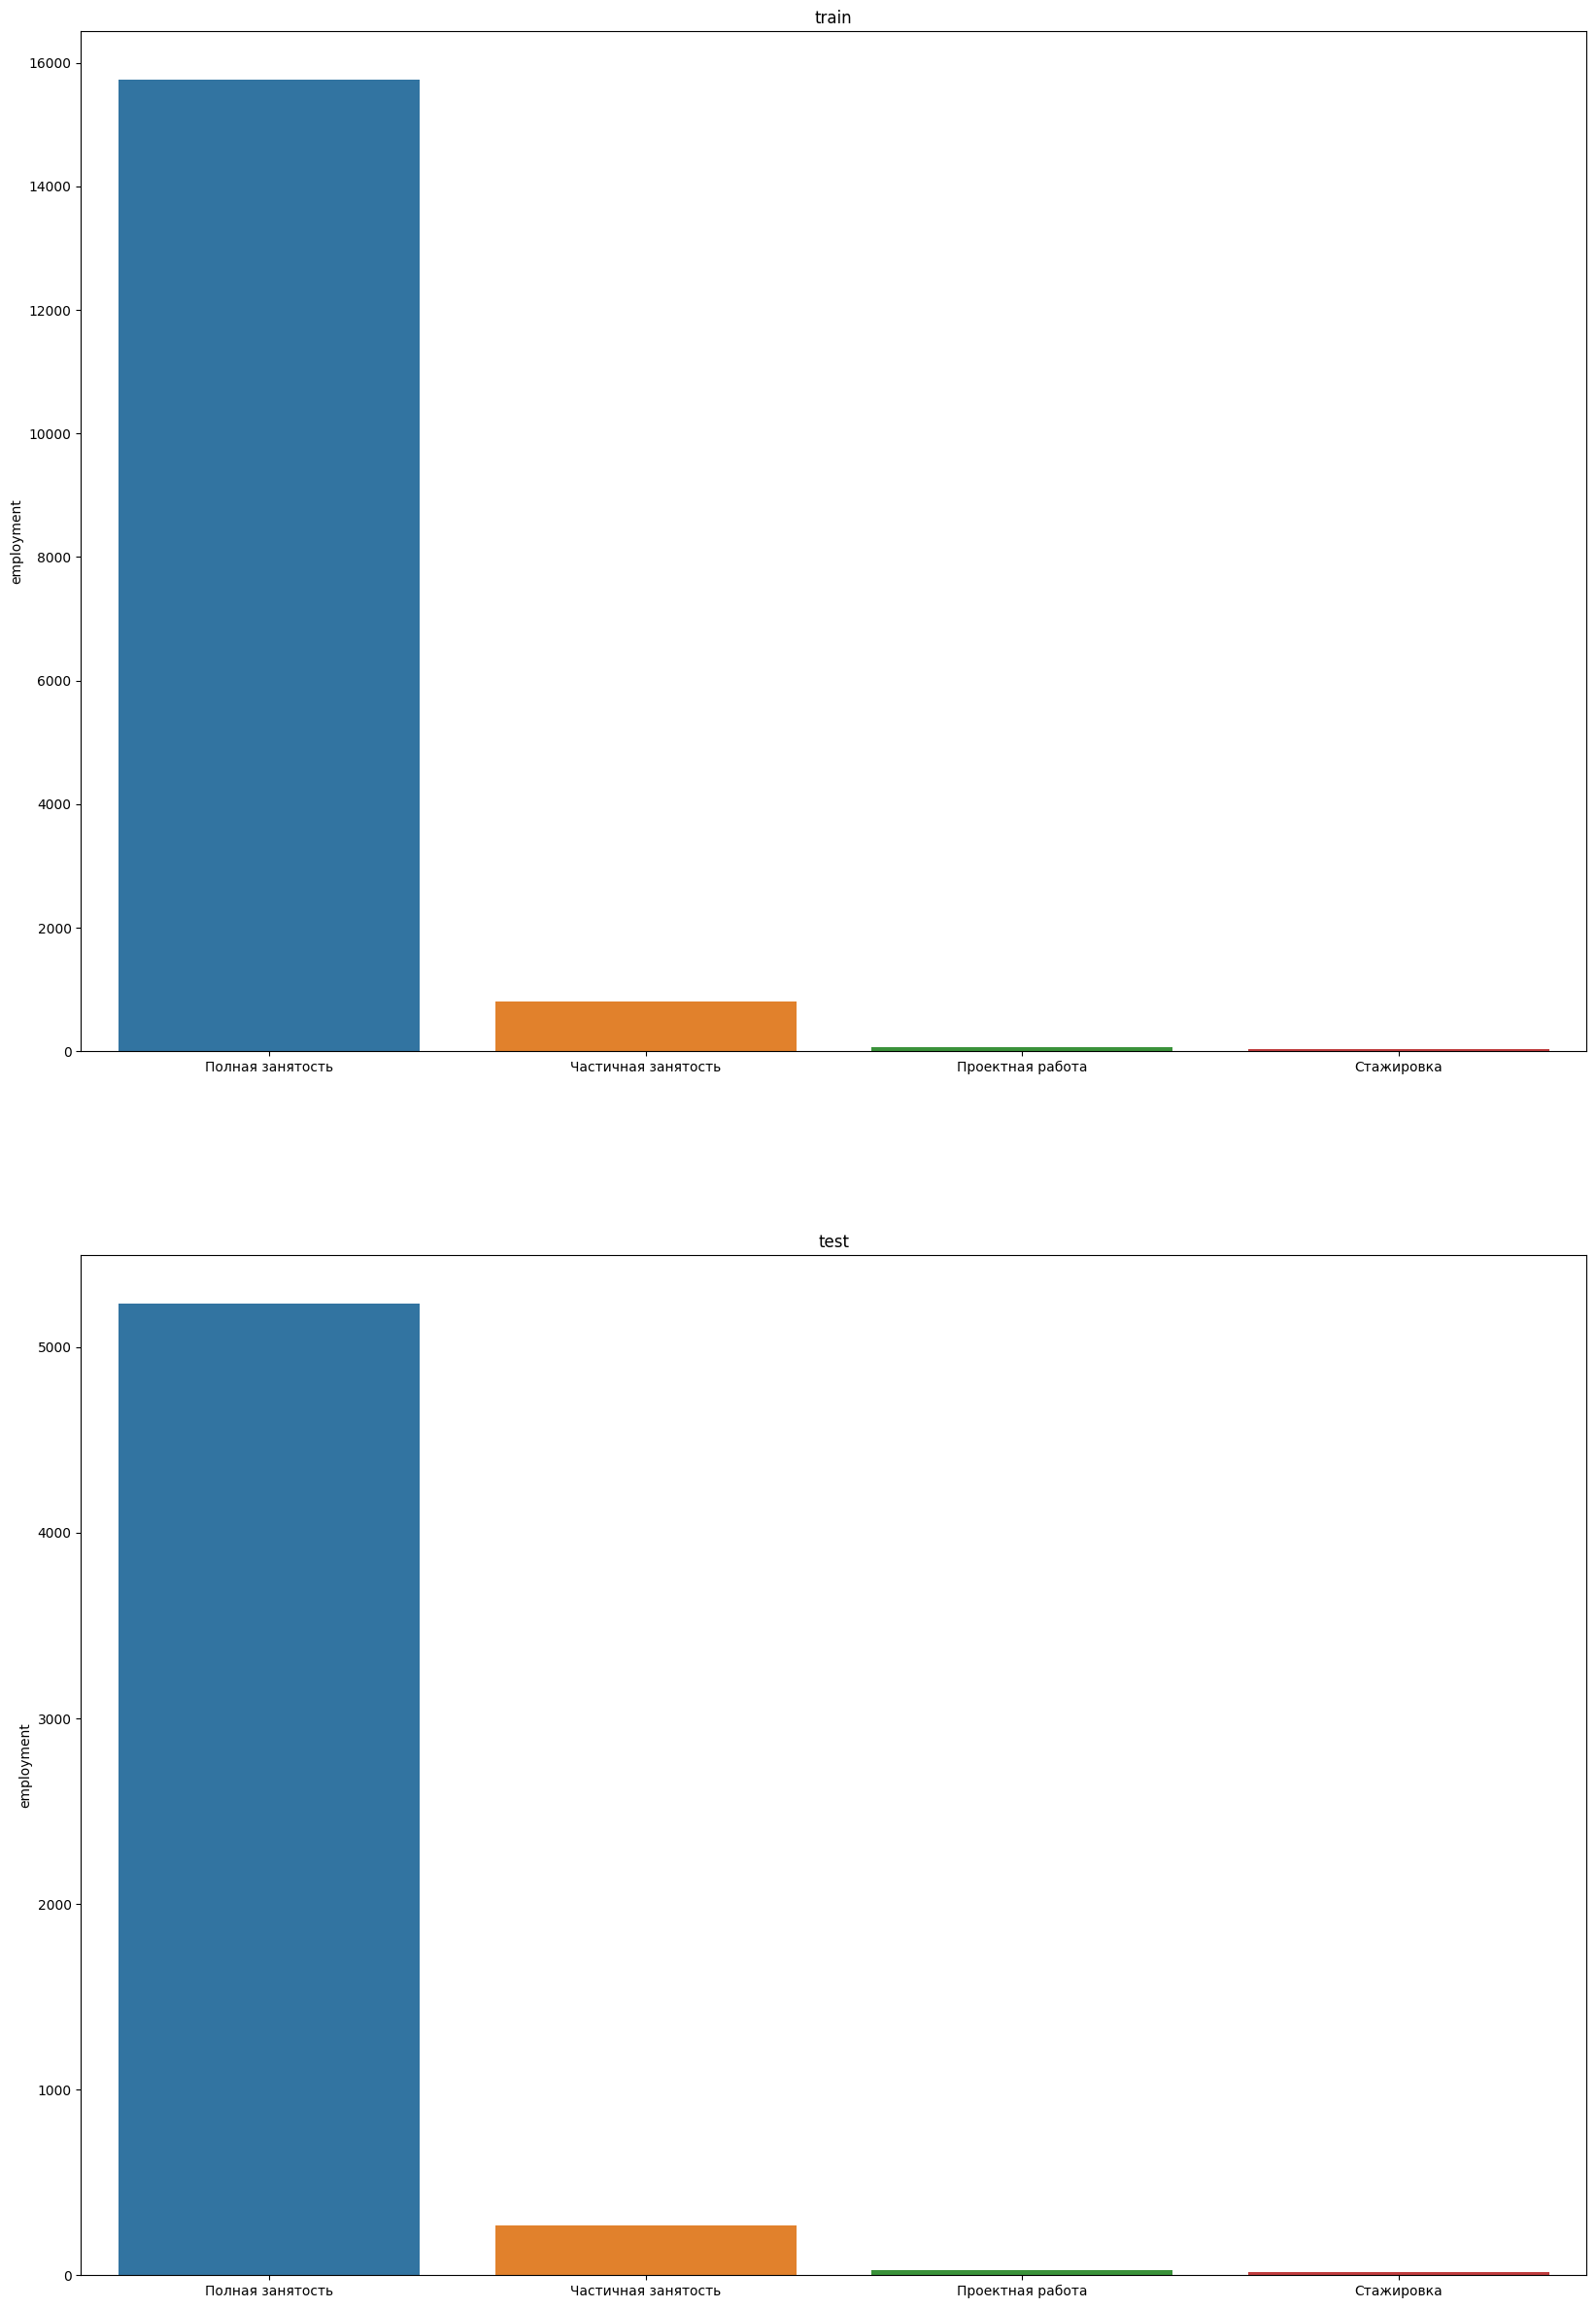

In [75]:
fig, ax = plt.subplots(2, 1, figsize=(20, 30))
ax1 = plot_cat_feature_bar(train_df, "employment", ax=ax[0])
ax1.set_title("train")
ax2 = plot_cat_feature_bar(test_df, "employment", ax=ax[1])
ax2.set_title("test")
pass

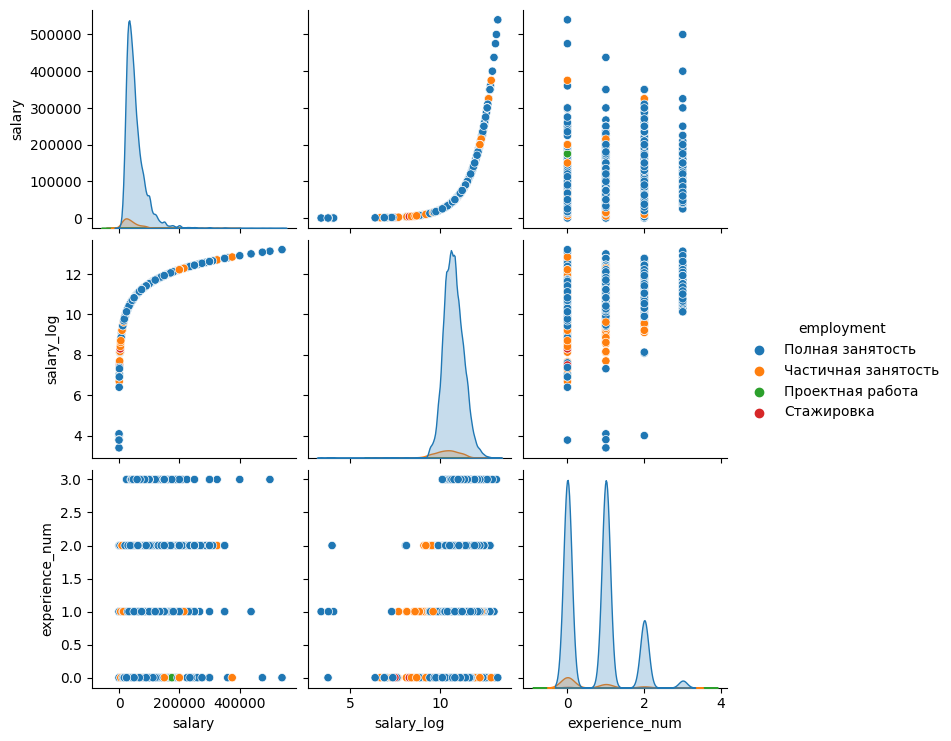

In [76]:
sns.pairplot(pd.concat([train_df[['salary', "employment"]], 
                        additional_features[['salary_log', 'experience_num']]], axis=1), hue="employment")

In [77]:
dummies = pd.get_dummies(train_df.employment)
display(dummies.head())
dummies.columns = ['employment_full', 'employment_project', 'employment_intership', 'employment_patrial']
display(dummies.head())

,Полная занятость,Проектная работа,Стажировка,Частичная занятость
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


,employment_full,employment_project,employment_intership,employment_patrial
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [78]:
additional_features = pd.concat([additional_features, dummies], axis=1)

In [79]:
additional_features

,salary_log,experience_num,experience_intern,experience_junior,experience_middle,experience_senior,schedule_vacht,schedule_flexible,schedule_full,schedule_shift,schedule_remote,employment_full,employment_project,employment_intership,employment_patrial
0,10.657259,2,0,0,1,0,0,0,1,0,0,1,0,0,0
1,10.819778,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,10.357743,0,1,0,0,0,0,0,0,1,0,1,0,0,0
3,10.510532,1,0,1,0,0,0,0,1,0,0,1,0,0,0
4,10.518673,0,1,0,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16624,11.119883,0,1,0,0,0,0,0,1,0,0,1,0,0,0
16625,10.819778,0,1,0,0,0,0,0,1,0,0,1,0,0,0
16626,10.819778,1,0,1,0,0,0,0,1,0,0,1,0,0,0
16627,11.225243,1,0,1,0,0,1,0,0,0,0,1,0,0,0


### Теперь колонка key_skills

In [80]:
from ast import literal_eval

In [81]:
skills_count = dict()

for skill_list in train_df.key_skills:
    list_of_skills = literal_eval(skill_list)
    for skill in list_of_skills:
        if skill not in skills_count:
            skills_count[skill] = 1
        else:
            skills_count[skill] += 1

skills_count = {k: v for k, v in sorted(skills_count.items(), key=lambda item: item[1], reverse=True)}
skills_count

{'Работа в команде': 2773,
 'Пользователь ПК': 2638,
 'Грамотная речь': 2226,
 'Умение работать в команде': 1152,
 'Активные продажи': 1066,
 'Деловое общение': 851,
 'Навыки продаж': 700,
 'Телефонные переговоры': 649,
 'Ведение переговоров': 630,
 'Организаторские навыки': 588,
 'Деловая переписка': 523,
 'Клиентоориентированность': 515,
 'Обучение и развитие': 494,
 'Поиск и привлечение клиентов': 479,
 'Грамотность': 462,
 'Работа с большим объемом информации': 420,
 'Прямые продажи': 402,
 'Заключение договоров': 357,
 'Холодные продажи': 352,
 'Ориентация на результат': 349,
 'AutoCAD': 344,
 'Управление персоналом': 342,
 'Консультирование': 340,
 '1С: Предприятие 8': 323,
 'Обучение персонала': 322,
 'Работа с людьми': 304,
 'Водительское удостоверение категории B': 289,
 'Навыки межличностного общения': 283,
 'Деловая коммуникация': 282,
 'Работа с кассой': 278,
 'Знание устройства автомобиля': 275,
 'Медицинская документация': 265,
 'Умение работать в коллективе': 264,
 'Англ

In [82]:
num_lt_5 = 0
for keys, values in skills_count.items():
    if values <= 5:
        num_lt_5 += 1
print(num_lt_5)

3404


In [83]:
len(skills_count) - num_lt_5

953

In [84]:
def preprocess_skills(text):
    text = text.replace("Работа", "")
    text = text.replace("работа", "")
    text = text.replace("Умение", "")
    text = text.replace("умение", "")
    text = text.replace("/", " ")
    text = text.replace("с", "")
    text = text.replace(":", "")
    text = text.replace("-", " ")
    text = text.replace("и", "")
    text = " ".join([word for word in text.split(" ") if len(word)])
    return text

In [85]:
def get_complex_embedding(text, emb_model, emb_size=300):
    result = np.zeros(emb_size)
    num_words = 0
    for word in text.split(" "):
        if word in emb_model:
            result += np.array(emb_model[word])
            num_words += 1
    if num_words:
        result /= num_words
    return result

In [86]:
shrinked_skills = {
    key:value 
    for key, value in skills_count.items() if value >= 5
}

In [87]:
len(shrinked_skills)

1073

In [88]:
#ft = fasttext.load_model('cc.ru.300.bin')

In [89]:
word_2_vec_skills = dict()

In [90]:
for keys, values in tqdm(shrinked_skills.items()):
    word_2_vec_skills[keys] = get_complex_embedding(preprocess_skills(keys), ft)

  0%|          | 0/1073 [00:00<?, ?it/s]

In [91]:
ordered_skills = np.array(list(shrinked_skills.keys()))

In [92]:
ordered_skills

array(['Работа в команде', 'Пользователь ПК', 'Грамотная речь', ...,
       'Умение работать с большим объемом информации',
       'Обработка исходящей корреспонденции', 'Аналитика'], dtype='<U75')

In [93]:
word_2_vec_skills['Работа в команде']

array([ 5.42174745e-02,  3.65555836e-02,  4.00207238e-02, -4.53510461e-02,
       -5.18510249e-02,  1.38967955e-02,  6.71879612e-02,  1.64704281e-03,
        1.17816720e-02, -9.01321694e-03, -1.04019001e-01, -1.51389978e-01,
       -3.38262580e-02,  8.14124942e-04, -3.67503799e-03,  6.78466726e-02,
       -8.04301444e-03, -2.62536790e-03,  1.24082984e-02, -1.50153786e-03,
       -4.87711591e-02, -1.04261391e-01,  7.56260660e-03, -4.46918849e-02,
        3.43036038e-02, -1.21771119e-02,  2.82493085e-02,  3.07055349e-02,
       -3.76597662e-02, -1.59170252e-03,  3.52345090e-02, -4.15942501e-02,
        5.27155548e-02, -3.00078816e-03, -7.82765566e-02, -1.99409761e-02,
        1.93882715e-01, -7.88793400e-01, -4.79475530e-02, -1.71841621e-01,
       -8.40879441e-03,  9.13236747e-02,  1.50785830e-02,  1.28438976e-01,
       -1.12313338e-01, -1.69411674e-02, -2.59474888e-01,  3.66527494e-03,
       -2.38864006e-01, -4.32661697e-02, -2.95559419e-02, -6.39489498e-02,
        1.64471837e-02,  

In [94]:
word_2_vec_skills["Работа в команде"]

array([ 5.42174745e-02,  3.65555836e-02,  4.00207238e-02, -4.53510461e-02,
       -5.18510249e-02,  1.38967955e-02,  6.71879612e-02,  1.64704281e-03,
        1.17816720e-02, -9.01321694e-03, -1.04019001e-01, -1.51389978e-01,
       -3.38262580e-02,  8.14124942e-04, -3.67503799e-03,  6.78466726e-02,
       -8.04301444e-03, -2.62536790e-03,  1.24082984e-02, -1.50153786e-03,
       -4.87711591e-02, -1.04261391e-01,  7.56260660e-03, -4.46918849e-02,
        3.43036038e-02, -1.21771119e-02,  2.82493085e-02,  3.07055349e-02,
       -3.76597662e-02, -1.59170252e-03,  3.52345090e-02, -4.15942501e-02,
        5.27155548e-02, -3.00078816e-03, -7.82765566e-02, -1.99409761e-02,
        1.93882715e-01, -7.88793400e-01, -4.79475530e-02, -1.71841621e-01,
       -8.40879441e-03,  9.13236747e-02,  1.50785830e-02,  1.28438976e-01,
       -1.12313338e-01, -1.69411674e-02, -2.59474888e-01,  3.66527494e-03,
       -2.38864006e-01, -4.32661697e-02, -2.95559419e-02, -6.39489498e-02,
        1.64471837e-02,  

In [95]:
from sklearn.cluster import KMeans

In [96]:
clustering_data = np.stack([values for keys, values in word_2_vec_skills.items()], axis=0)

In [97]:
clustering_data.shape

(1073, 300)

In [98]:
model = KMeans(n_clusters=10, random_state=1000)
model.fit(clustering_data)
yhat = model.predict(clustering_data)
clusters = np.unique(yhat)
groups = dict()
for cluster in clusters:
    indexes = np.where(yhat==cluster)
    groups[cluster] = ordered_skills[indexes]

C:\Users\Windows\anaconda3\envs\kaggle_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [99]:
groups

{0: array(['MS Outlook', 'MS PowerPoint', 'MS Excel', 'MS Internet Explorer',
        'MS Office', 'MS Dos', 'MS Access', 'MS Paint', 'MS Word',
        'MS Project', 'MS Visio', 'MS Publisher', 'MS SQL',
        '3D Моделирование', 'Знание MS Office', 'MS Movie Maker',
        'Windows Xp', 'UI', 'UX', 'Windows Os',
        'Опытный пользовать ПК, знание MS Office', 'MS SQL Server',
        'MS CRM', 'Mac Os', 'C/C++'], dtype='<U75'),
 1: array(['Грамотная речь', 'Активные продажи', 'Деловое общение',
        'Навыки продаж', 'Телефонные переговоры', 'Ведение переговоров',
        'Организаторские навыки', 'Деловая переписка',
        'Клиентоориентированность', 'Обучение и развитие',
        'Поиск и привлечение клиентов', 'Грамотность',
        'Работа с большим объемом информации', 'Прямые продажи',
        'Заключение договоров', 'Холодные продажи',
        'Управление персоналом', 'Консультирование', 'Обучение персонала',
        'Работа с людьми', 'Навыки межличностного общения'

In [100]:
new_features_based_on_skills = {
    "skills_0": [0]*train_df.shape[0],
    "skills_1": [0]*train_df.shape[0],
    "skills_2": [0]*train_df.shape[0],
    "skills_3": [0]*train_df.shape[0],
    "skills_4": [0]*train_df.shape[0],
    "skills_5": [0]*train_df.shape[0],
    "skills_6": [0]*train_df.shape[0],
    "skills_7": [0]*train_df.shape[0],
    "skills_8": [0]*train_df.shape[0],
    "skills_9": [0]*train_df.shape[0],
}
for index, required_skills in tqdm(enumerate(train_df['key_skills'])):
    for skill in literal_eval(required_skills):
        for cluster_num in range(10):
            if skill in groups[cluster_num]:
                ind = "skills_" + str(cluster_num)
                new_features_based_on_skills[ind][index] += 1
                
                
new_features_based_on_skills = pd.DataFrame(new_features_based_on_skills)

0it [00:00, ?it/s]

In [101]:
pd.concat([new_features_based_on_skills, additional_features.salary_log], axis=1).corr()

,skills_0,skills_1,skills_2,skills_3,skills_4,skills_5,skills_6,skills_7,skills_8,skills_9,salary_log
skills_0,1.000000,0.098323,0.044250,0.000032,0.076214,0.005414,0.050164,-0.004363,0.103118,0.010734,0.040109
skills_1,0.098323,1.000000,0.058262,0.321491,0.003664,0.134635,0.037702,0.132684,0.236083,0.282010,0.092968
skills_2,0.044250,0.058262,1.000000,0.007020,0.041230,-0.006415,0.163116,-0.003310,0.212462,0.031848,0.029588
skills_3,0.000032,0.321491,0.007020,1.000000,-0.036331,0.125103,-0.012499,0.083092,0.130536,0.060724,0.004346
skills_4,0.076214,0.003664,0.041230,-0.036331,1.000000,-0.024713,-0.003841,-0.015421,-0.030559,0.001490,0.162956
skills_5,0.005414,0.134635,-0.006415,0.125103,-0.024713,1.000000,-0.011879,0.054011,0.113724,-0.004415,-0.023070
skills_6,0.050164,0.037702,0.163116,-0.012499,-0.003841,-0.011879,1.000000,-0.010171,0.152620,0.040118,-0.002418
skills_7,-0.004363,0.132684,-0.003310,0.083092,-0.015421,0.054011,-0.010171,1.000000,0.061143,0.018110,-0.013137
skills_8,0.103118,0.236083,0.212462,0.130536,-0.030559,0.113724,0.152620,0.061143,1.000000,0.045912,-0.056795
skills_9,0.010734,0.282010,0.031848,0.060724,0.001490,-0.004415,0.040118,0.018110,0.045912,1.000000,0.080396


In [107]:
additional_features = pd.concat([additional_features, new_features_based_on_skills], axis=1)

In [109]:
additional_features.to_csv("data/additional_features_train.csv")

# Feature engineering on test

In [133]:
additional_features_test = pd.DataFrame()

In [134]:
additional_features_test['experience_num'] = test_df.experience.apply(
    {"Нет опыта":0, "От 1 года до 3 лет": 1, "От 3 до 6 лет": 2, "Более 6 лет": 3}.get)

In [135]:
dummies = pd.get_dummies(test_df.experience)
dummies.head()

,Более 6 лет,Нет опыта,От 1 года до 3 лет,От 3 до 6 лет
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0


In [136]:
dummies.columns = ['experience_senior', 'experience_intern', 'experience_junior', 'experience_middle']
dummies = dummies[['experience_intern', 'experience_junior', 'experience_middle', 'experience_senior']]

In [137]:
additional_features_test = pd.concat([dummies, additional_features_test], axis=1)

In [138]:
dummies = pd.get_dummies(test_df.schedule)
display(dummies.head())
dummies.columns = ['schedule_vacht', 'schedule_flexible', 'schedule_full', 'schedule_shift', 'schedule_remote']
display(dummies.head())

,Вахтовый метод,Гибкий график,Полный день,Сменный график,Удаленная работа
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0


,schedule_vacht,schedule_flexible,schedule_full,schedule_shift,schedule_remote
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0


In [139]:
additional_features_test = pd.concat([additional_features_test, dummies], axis=1)

In [140]:
dummies = pd.get_dummies(test_df.employment)
display(dummies.head())
dummies.columns = ['employment_full', 'employment_project', 'employment_intership', 'employment_patrial']
display(dummies.head())

,Полная занятость,Проектная работа,Стажировка,Частичная занятость
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


,employment_full,employment_project,employment_intership,employment_patrial
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [141]:
additional_features_test = pd.concat([additional_features_test, dummies], axis=1)

In [142]:
new_features_based_on_skills = {
    "skills_0": [0]*test_df.shape[0],
    "skills_1": [0]*test_df.shape[0],
    "skills_2": [0]*test_df.shape[0],
    "skills_3": [0]*test_df.shape[0],
    "skills_4": [0]*test_df.shape[0],
    "skills_5": [0]*test_df.shape[0],
    "skills_6": [0]*test_df.shape[0],
    "skills_7": [0]*test_df.shape[0],
    "skills_8": [0]*test_df.shape[0],
    "skills_9": [0]*test_df.shape[0],
}
for index, required_skills in tqdm(enumerate(test_df['key_skills'])):
    for skill in literal_eval(required_skills):
        for cluster_num in range(10):
            if skill in groups[cluster_num]:
                ind = "skills_" + str(cluster_num)
                new_features_based_on_skills[ind][index] += 1
                
                
new_features_based_on_skills = pd.DataFrame(new_features_based_on_skills)

0it [00:00, ?it/s]

In [143]:
additional_features_test = pd.concat([additional_features_test, new_features_based_on_skills], axis=1)

In [144]:
additional_features_test.to_csv("data/additional_features_test.csv")

# Try on embedding sentences

In [150]:
import gensim

In [156]:
ft.get_line("привет тебе , человек")

(['привет', 'тебе', ',', 'человек', '</s>'], [])

In [159]:
ft.get_sentence_vector(train_df.cleaned[0])

array([ 4.85659651e-02, -2.05652919e-02, -1.30258668e-02,  1.28855342e-02,
        2.12801956e-02, -2.11697388e-02,  3.52868326e-02,  1.41556561e-02,
       -2.40841359e-02,  1.14597399e-02,  1.78094935e-02,  1.81999691e-02,
        4.99667414e-03,  2.73799133e-02, -2.29074550e-03,  1.46392966e-02,
        1.57621298e-02,  8.04262143e-03, -3.35746258e-02,  1.44055216e-02,
        7.39748124e-03, -3.66294682e-02, -1.96512677e-02,  9.60362423e-03,
        2.12026909e-02,  5.78099117e-03, -1.57342646e-02, -5.96344518e-03,
        2.01046690e-02,  2.68483553e-02,  2.10356712e-02, -8.54437333e-03,
       -2.20552888e-02, -1.12773329e-02,  4.33214149e-03, -7.88704026e-03,
        1.11498842e-02, -1.19971469e-01, -2.76484769e-02, -7.47082740e-05,
       -1.59092154e-02, -1.93751007e-02, -1.61325056e-02, -2.84005771e-03,
       -1.19087854e-02, -2.93348567e-04, -4.11614031e-02,  5.92299318e-03,
        3.14886719e-02,  2.75769308e-02,  2.94624511e-02, -2.13331054e-03,
        1.30306790e-02,  

In [176]:
ft.getsetrain_df.cleaned[225]

array([ 1.16073452e-02, -1.87870711e-02, -3.95825133e-04, -2.62770336e-04,
       -1.26980990e-02, -1.19154397e-02, -2.09162012e-04, -8.77082162e-03,
        2.85348687e-02,  2.58758739e-02, -2.15005986e-02, -1.02907792e-03,
       -6.37460407e-03, -8.54544714e-03, -1.75976232e-02, -1.44402459e-02,
       -2.31435988e-02,  5.24265971e-03,  1.65548455e-02, -3.64671275e-03,
        1.89559050e-02, -1.90648474e-02,  1.03642736e-02, -9.78267007e-03,
        3.72375697e-02, -1.98745653e-02, -1.14773829e-02, -3.19453478e-02,
       -8.75454769e-03, -1.15646049e-04, -1.07550528e-02, -3.05353105e-03,
       -1.45350797e-02, -8.93759355e-03, -3.38130631e-04, -1.49166826e-02,
        1.71535276e-02,  1.11001506e-02, -5.43881953e-03, -1.48472395e-02,
        1.46526657e-02,  3.07218172e-03, -1.25161484e-02, -6.47673383e-03,
        2.89239176e-03,  6.51149638e-03, -3.54994088e-03,  2.17037983e-02,
        2.22253371e-02,  5.00641763e-03,  1.22584496e-02,  8.74539930e-03,
       -1.47687439e-02,  

In [173]:
train_df.cleaned[245]

'обязанность выкладка товар функция кассир знание ассортимент канцелярский товар желание учиться что новый требование желательный опыт работа торговля ответственность аккуратность условие график работа сменный оформление тк '

In [185]:
for index, text in tqdm(enumerate(train_df.cleaned)):
    if index == 0:
        fasttext_transformed_sentences_train = ft.get_sentence_vector(text)
    else:
        fasttext_transformed_sentences_train = np.vstack(
            (fasttext_transformed_sentences_train, ft.get_sentence_vector(text))
        )

0it [00:00, ?it/s]

In [193]:
for index, text in tqdm(enumerate(test_df.cleaned)):
    if index == 0:
        fasttext_transformed_sentences_test = ft.get_sentence_vector(text)
    else:
        fasttext_transformed_sentences_test = np.vstack(
            (fasttext_transformed_sentences_test, ft.get_sentence_vector(text))
        )

0it [00:00, ?it/s]

In [207]:
pd.DataFrame(fasttext_transformed_sentences_train).to_csv("data/fasttext_train.csv", index=False)

In [208]:
pd.DataFrame(fasttext_transformed_sentences_test).to_csv("data/fasttext_test.csv", index=False)